# Car Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.linear_model._logistic import LogisticRegression

In [2]:
car_data = pd.read_csv('car.csv')
car_data

,buying,maint,doors,persons,lug_boot,safety,label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   label     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
car_data.describe()

,buying,maint,doors,persons,lug_boot,safety,label
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [204]:
def balance_data(labels):
    car_data.label = ['acc' if((l=='good') | (l=='vgood') | (l=='acc')) else 'unacc' for l in car_data.label]

In [205]:
car_data = pd.concat([
    car_data[car_data.label == 'acc'],
    car_data[car_data.label == 'unacc'].sample(n=518)
])

def balance_data(data):
    return(pd.concat([
    data[data.label == 'acc'],
    data[data.label == 'unacc'].sample(n=518)
    ]))
car_data = balance_data(car_data)

In [206]:
car_data

,buying,maint,doors,persons,lug_boot,safety,label
227,vhigh,med,2,4,small,high,acc
230,vhigh,med,2,4,med,high,acc
232,vhigh,med,2,4,big,med,acc
233,vhigh,med,2,4,big,high,acc
239,vhigh,med,2,more,med,high,acc
...,...,...,...,...,...,...,...
18,vhigh,vhigh,2,more,small,low,unacc
526,high,vhigh,5more,4,med,med,unacc
53,vhigh,vhigh,3,more,big,high,unacc
1521,low,med,2,4,small,low,unacc


In [207]:
car_data.label.value_counts()

unacc    518
acc      384
Name: label, dtype: int64

In [208]:
le = LabelEncoder()
car_data.label  = le.fit_transform(car_data.label )

In [209]:
car_data.label.value_counts()

1    518
0    384
Name: label, dtype: int64

In [210]:
X_train,X_test,y_train,y_test = train_test_split(car_data.drop(columns=['label']),
                                                 car_data['label'],
                                                 test_size=0.2,
                                                random_state=0)

In [211]:
X_train

,buying,maint,doors,persons,lug_boot,safety
590,high,high,3,more,med,high
1549,low,med,3,4,small,med
557,high,high,2,4,big,high
575,high,high,3,2,big,high
1404,low,high,2,2,small,low
...,...,...,...,...,...,...
443,high,vhigh,2,4,small,high
913,med,vhigh,3,more,med,med
1593,low,med,5more,2,small,low
1520,low,med,2,2,big,high


In [212]:
# ohe = OrdinalEncoder()
# ohe.fit(car_data[['buying', 'maint', 'lug_boot', 'safety', 'persons', 'doors']])

In [213]:
# columTransformer = ColumnTransformer(transformers=[
#     ('tf1', OrdinalEncoder(categories=[['low', 'med','high','vhigh']]),['buying', 'maint']),
#     ('tf2', OrdinalEncoder(categories=[['small', 'med', 'big']]),['lug_boot']),
#     ('tf3', OrdinalEncoder(categories=[['low', 'med', 'high']]), ['safety']),
#     ('tf6', OrdinalEncoder(categories=[['2', '4', 'more']]), ['persons']),
#     ('tf7', OrdinalEncoder(categories=[['2', '3', '4','5more']]), ['doors'])
# ], remainder='passthrough')

columTransformer = ColumnTransformer(transformers=
    [
        ('tf1', OrdinalEncoder(categories=ohe.categories_),['buying', 'maint', 'lug_boot', 'safety', 'persons', 'doors'])
 
 ],
 remainder='passthrough')

In [214]:
y_test

1073    0
706     1
1522    0
1058    1
1287    1
       ..
232     0
936     1
1077    1
9       1
1050    1
Name: label, Length: 181, dtype: int32

In [215]:
# min_max_trans = ColumnTransformer([
#     ('tf5', MinMaxScaler(),slice(0,10))
# ], remainder='passthrough')

In [216]:
X_train = columTransformer.fit_transform(X_train)

In [217]:
X_train

array([[0., 0., 1., 0., 2., 1.],
       [1., 2., 2., 2., 1., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 2., 2., 1., 0., 3.],
       [1., 2., 0., 0., 0., 0.],
       [2., 3., 1., 0., 0., 2.]])

In [218]:
X_test = columTransformer.fit_transform(X_test)

In [219]:
#Decision Tree Classifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [220]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train,100)
y_pred = rf.predict(X_test)


In [221]:
print("RandomForestClassifier\n", accuracy_score(y_pred, y_test))
cm= confusion_matrix(y_pred, y_test)
print(classification_report(y_pred, y_test))

RandomForestClassifier
 0.9668508287292817
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        74
           1       0.95      0.99      0.97       107

    accuracy                           0.97       181
   macro avg       0.97      0.96      0.97       181
weighted avg       0.97      0.97      0.97       181



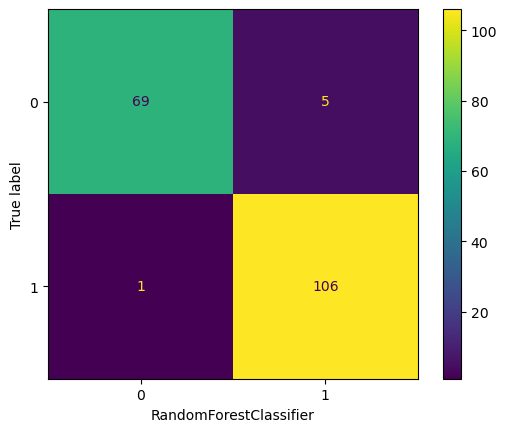

In [222]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.xlabel('RandomForestClassifier')
plt.show()

In [173]:
y_test = np.asarray(y_test)
misclassified = np.where(y_test != rf.predict(X_test))
misclassified

(array([ 62,  83, 120, 150], dtype=int64),)

In [116]:
#Random Forest Classifier
lr = LogisticRegression()
lr.fit(X_train, y_train,100)
y_pred = lr.predict(X_test)
print("LogisticRegression\n", accuracy_score(y_pred, y_test))
cm= confusion_matrix(y_pred, y_test)
print(classification_report(y_pred, y_test))

LogisticRegression
 0.7115384615384616
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       100
           1       0.70      0.77      0.73       108

    accuracy                           0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



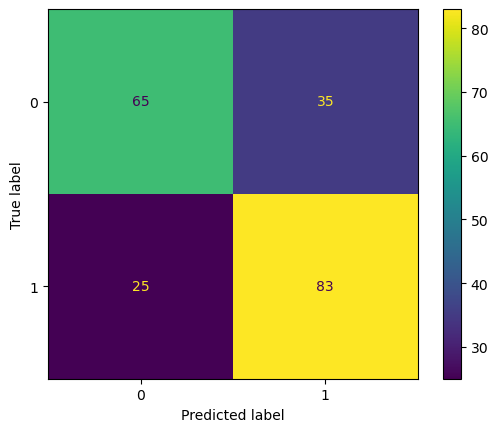

In [120]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [124]:
#Random Forest Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("DecisionTreeClassifier\n", accuracy_score(y_pred, y_test))
cm= confusion_matrix(y_pred, y_test)
print(classification_report(y_pred, y_test))

DecisionTreeClassifier
 0.9759615384615384
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.97      0.98      0.98       117

    accuracy                           0.98       208
   macro avg       0.98      0.97      0.98       208
weighted avg       0.98      0.98      0.98       208



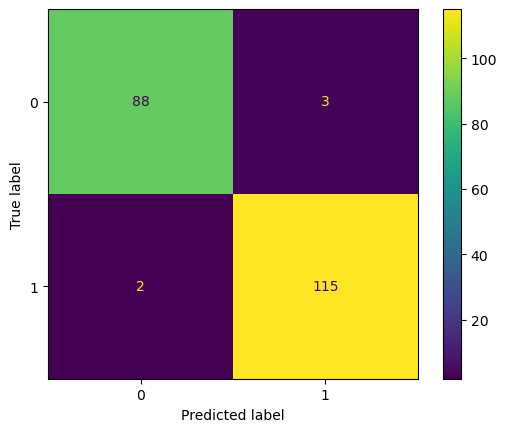

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()
plt.show()

In [106]:
#Random Forest Classifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("MLPClassifier\n", accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

MLPClassifier
 0.9375
[[ 88  11]
 [  2 107]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        99
           1       0.91      0.98      0.94       109

    accuracy                           0.94       208
   macro avg       0.94      0.94      0.94       208
weighted avg       0.94      0.94      0.94       208



C:\Users\Zahid-CS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [108]:
#Random Forest Classifier
nb = CategoricalNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("CategoricalNB\n", accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

CategoricalNB
 0.9278846153846154
[[ 90  15]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       105
           1       0.87      1.00      0.93       103

    accuracy                           0.93       208
   macro avg       0.94      0.93      0.93       208
weighted avg       0.94      0.93      0.93       208



In [84]:
accuracy_score(y_pred, y_test)

0.9759615384615384

In [85]:
confusion_matrix(y_pred, y_test)

array([[ 88,   3],
       [  2, 115]], dtype=int64)

In [86]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.97        91\n           1       0.97      0.98      0.98       117\n\n    accuracy                           0.98       208\n   macro avg       0.98      0.97      0.98       208\nweighted avg       0.98      0.98      0.98       208\n'

In [182]:
# export 
import pickle
pickle.dump(rf,open('RandomForestModel.pkl','wb'))


In [183]:
pickle.dump(tree,open('DecisionTree.pkl','wb'))
pickle.dump(mlp,open('Neural Network.pkl','wb'))
pickle.dump(nb,open('NaiveBais.pkl','wb'))